In [1]:
%matplotlib inline

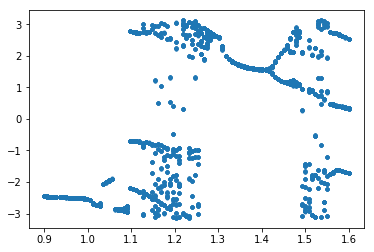

CPU times: user 1.5 s, sys: 4.32 s, total: 5.82 s
Wall time: 47 s


In [9]:
%%time

# RK4 on a double differential eqn.
from numpy import arange
from pylab import *
l = 9.8
g = l
q = .5
Omega = 2/3


def f1(theta, omega, t, fd):
    return omega


def f2(theta, omega, t, fd):
    return -(g/l)*sin(theta) - q*omega + fd*sin(Omega * t)


def thetomega(theta0, omega0, f1, f2, time, fd):

    theta = theta0
    omega = omega0

    thetapoints = []
    omegapoints = []
    h = 10**-3
    tpoints = arange(0, time, h)
    for t in tpoints:
        theta = theta - 2*pi if theta > pi else theta + 2*pi if theta < -1*pi else theta
        if Omega * t % (2*pi) <= 5*h and t > 100:
            thetapoints.append(theta)
            omegapoints.append(omega)

        k1 = h * f1(theta, omega, t, fd)
        l1 = h * f2(theta, omega, t, fd)
        k2 = h*f1(theta+k1/2, omega+l1/2, t+h/2, fd)
        l2 = h*f2(theta+k1/2, omega+l1/2, t+h/2, fd)
        k3 = h*f1(theta+k2/2, omega+l2/2, t+h/2, fd)
        l3 = h*f2(theta+k2/2, omega+l2/2, t+h/2, fd)
        k4 = h*f1(theta+k3, omega+l3, t+h, fd)
        l4 = h*f2(theta+k3, omega+l3, t+h, fd)
        theta = theta + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        omega = omega + 1/6 * (l1 + 2*l2 + 2*l3 + l4)
    return thetapoints, omegapoints, tpoints


#thetapoints, omegapoints, tpoints = thetomega(0.2, 0, f1, f2, 2000, F_d)



def f(F_d):
    thetapoints, omegapoints, tpoints = thetomega(0.2, 0, f1, f2, 200, F_d)
    return [[F_d, point] for point in thetapoints] 

        
from multiprocessing import Pool
pool = Pool(32)
out = pool.map(f,  linspace(0.9, 1.6, 100))
    
flat_list = [item for sublist in out for item in sublist]
plot(*zip(*flat_list) , ".")
show()